In [13]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np
import random

In [146]:
n_timesteps_in = 10 
n_timesteps_out = 15
n_features_in = 1
n_features_out = 1

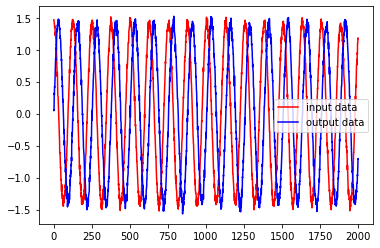

In [147]:
time_series_length = 2000
t = np.linspace(0, 25, time_series_length)
ts_input = np.sin(t) / 10 + 8 * np.cos(t*4) + 0.25 * np.random.standard_normal(size=time_series_length)
ts_output = np.cos(t) / 9 + 7 * np.sin(t*4) + 0.25 * np.random.standard_normal(size=time_series_length)

ts_norm_input = (ts_input - np.mean(ts_input)) / np.std(ts_input)
ts_norm_output = (ts_output - np.mean(ts_output)) / np.std(ts_output)
plt.plot(ts_norm_input, 'r', label = 'input data')
plt.plot(ts_norm_output,'b', label = 'output data')

plt.legend()

In [148]:
train_size = int(len(ts_input) * 0.8)
test_size = len(ts_input) - train_size

train_input, test_input = norming_input[:train_size], norming_input[train_size:]
train_output, test_output = norming_output[:train_size], norming_output[train_size:]

In [149]:
seq_len = max(n_timesteps_in, n_timesteps_out)
def create_dataset():
    train_input_data, train_output_data = [], []
    for i in range(1000):
        rand_ind_train = random.randint(0, len(train_input) - seq_len)
        input_seq = norming_input[rand_ind_train:rand_ind_train+n_timesteps_in]
        output_seq = norming_output[rand_ind_train:rand_ind_train+n_timesteps_out]
        train_input_data.append(input_seq)
        train_output_data.append(output_seq)

    test_input_data, test_output_data = [], []   
    for i in range(10):
        rand_ind_test = random.randint(0, len(test_input) - seq_len)
        input_seq = norming_input[rand_ind_test:rand_ind_test+n_timesteps_in]
        output_seq = norming_output[rand_ind_test:rand_ind_test+n_timesteps_out]
        test_input_data.append(input_seq)
        test_output_data.append(output_seq)
    return np.array(train_input_data), np.array(train_output_data), np.array(test_input_data), np.array(test_output_data)

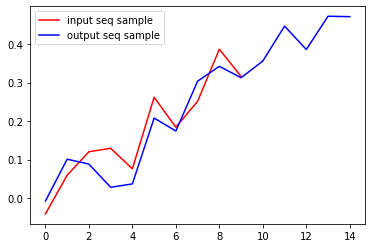

In [150]:
train_input_data, train_output_data, test_input_data, test_output_data = create_dataset()
plt.plot(train_input_data[0], 'r', label = 'input seq sample')
plt.plot(train_output_data[0], 'b', label = 'output seq sample')
plt.legend()

In [151]:
train_input_data = np.reshape(train_input_data, (train_input_data.shape[0], n_timesteps_in, n_features_in))
train_output_data = np.reshape(train_output_data, (train_input_data.shape[0], n_timesteps_out, n_features_out))

test_input_data = np.reshape(test_input_data, (test_input_data.shape[0], n_timesteps_in, n_features_in))
test_output_data = np.reshape(test_output_data, (test_input_data.shape[0], n_timesteps_out, n_features_out))

In [152]:
n_units = 256

encoder_inputs = keras.Input(shape=(n_timesteps_in, n_features_in))
encoder = keras.layers.LSTM(n_units, return_sequences=False, return_state=True)
encoder_outputs, state_h, state_c = encoder(encoder_inputs)

encoder_states = [state_h, state_c]

decoder_inputs = keras.Input(shape=(n_timesteps_out, n_features_out))
decoder_lstm =  keras.layers.LSTM(n_units, return_sequences=True, return_state=True)

decoder_outputs, _, _ = decoder_lstm(decoder_inputs, initial_state=encoder_states)
decoder_dense = keras.layers.Dense(n_features_out, activation='linear')
decoder_outputs = decoder_dense(decoder_outputs)

model = keras.Model([encoder_inputs, decoder_inputs], decoder_outputs)


In [153]:
print(model.summary())

Model: "functional_19"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_25 (InputLayer)           [(None, 10, 1)]      0                                            
__________________________________________________________________________________________________
input_26 (InputLayer)           [(None, 15, 1)]      0                                            
__________________________________________________________________________________________________
lstm_25 (LSTM)                  [(None, 256), (None, 264192      input_25[0][0]                   
__________________________________________________________________________________________________
lstm_26 (LSTM)                  [(None, 15, 256), (N 264192      input_26[0][0]                   
                                                                 lstm_25[0][1]        

In [154]:
model.compile(optimizer='adam', loss='mse')

decoder_inputs = np.zeros(train_output_data.shape)

model.fit([train_input_data, decoder_inputs], train_output_data,
          epochs=35, batch_size=32, validation_split=0.4, verbose=2)

Epoch 1/35
19/19 - 2s - loss: 0.2650 - val_loss: 0.0338
Epoch 2/35
19/19 - 1s - loss: 0.0337 - val_loss: 0.0239
Epoch 3/35
19/19 - 1s - loss: 0.0233 - val_loss: 0.0227
Epoch 4/35
19/19 - 1s - loss: 0.0206 - val_loss: 0.0220
Epoch 5/35
19/19 - 1s - loss: 0.0180 - val_loss: 0.0182
Epoch 6/35
19/19 - 1s - loss: 0.0155 - val_loss: 0.0142
Epoch 7/35
19/19 - 1s - loss: 0.0133 - val_loss: 0.0135
Epoch 8/35
19/19 - 1s - loss: 0.0127 - val_loss: 0.0108
Epoch 9/35
19/19 - 1s - loss: 0.0108 - val_loss: 0.0099
Epoch 10/35
19/19 - 1s - loss: 0.0105 - val_loss: 0.0123
Epoch 11/35
19/19 - 1s - loss: 0.0124 - val_loss: 0.0093
Epoch 12/35
19/19 - 1s - loss: 0.0093 - val_loss: 0.0108
Epoch 13/35
19/19 - 1s - loss: 0.0100 - val_loss: 0.0105
Epoch 14/35
19/19 - 1s - loss: 0.0090 - val_loss: 0.0113
Epoch 15/35
19/19 - 1s - loss: 0.0091 - val_loss: 0.0089
Epoch 16/35
19/19 - 1s - loss: 0.0096 - val_loss: 0.0091
Epoch 17/35
19/19 - 1s - loss: 0.0083 - val_loss: 0.0102
Epoch 18/35
19/19 - 1s - loss: 0.0077 - 

In [155]:
decoder_inputs = np.zeros(test_output_data.shape)
y_pred = model.predict([test_input_data, decoder_inputs])

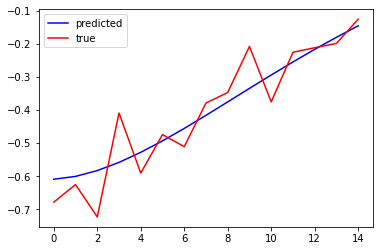

In [156]:
plt.plot(y_pred[0], 'b', label = 'predicted')
plt.plot(test_output_data[0], 'r', label = 'true')

plt.legend()

In [158]:
import tensorflow as tf
from tensorflow.keras import layers
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import layers
import time
from PIL import Image
from tensorflow.keras.datasets.fashion_mnist import load_data

In [171]:
np.random.seed(1337)
num_classes = 10

epochs = 8
latent_dim = 128

adam_lr = 0.002
adam_beta_1 = 0.4

batch_size = 64
num_channels = 1
num_classes = 10
image_size = 28


In [172]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
all_digits = np.concatenate([x_train, x_test])
all_labels = np.concatenate([y_train, y_test])

# Scale the pixel values to [0, 1] range, add a channel dimension to
# the images, and one-hot encode the labels.
all_digits = all_digits.astype("float32") / 255.0
all_digits = np.reshape(all_digits, (-1, 28, 28, 1))
all_labels = keras.utils.to_categorical(all_labels, 10)
dataset = tf.data.Dataset.from_tensor_slices((all_digits,all_labels))
dataset = dataset.shuffle(buffer_size=512).batch(batch_size).prefetch(32)


In [173]:
discriminator = keras.Sequential(
    [
        keras.layers.InputLayer((28, 28, 1)),
        layers.Conv2D(256, (3, 3), padding="same"),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        
        layers.Conv2D(64, (3, 3), padding='same'),
        layers.BatchNormalization(),
        layers.LeakyReLU(alpha=0.2),
        layers.Dropout(0.3),
        
        layers.Conv2D(128, (3, 3), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.3),
        layers.Dropout(0.5),
        layers.GlobalMaxPooling2D(),
        
        layers.Conv2D(32, (1, 1), strides=(3, 3), padding="same"),
        layers.LeakyReLU(alpha=0.3),
        layers.Dropout(0.5),
        layers.GlobalMaxPooling2D(),
        layers.Dense(1, activation='sigmoid'),
    ],
    name="discriminator",
)


generator = keras.Sequential(
    [
        keras.layers.InputLayer((128,)),
        layers.Dense(7 * 7 * 128),
        layers.LeakyReLU(alpha=0.2),
        layers.Reshape((7, 7, 128)),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same", kernel_initializer='glorot_normal'),
        layers.LeakyReLU(alpha=0.2),
        layers.Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"),
        layers.LeakyReLU(alpha=0.3),
        layers.Conv2D(1, (7, 7), padding="same", activation="sigmoid", kernel_initializer='glorot_normal'),
        
    ],
    name="generator",
)

In [174]:
class GAN(tf.keras.Model):
    def __init__(self, discriminator, generator, latent_dim):
        super(GAN, self).__init__()
        self.discriminator = discriminator
        self.generator = generator
        self.latent_dim = latent_dim

    def compile(self, d_optimizer, g_optimizer, loss_fn):
        super(GAN, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.loss_fn = loss_fn

    def train_step(self, real_images):
        if isinstance(real_images, tuple):
            real_images = real_images[0]
        batch_size = tf.shape(real_images)[0]
        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        generated_images = self.generator(random_latent_vectors)

        combined_images = tf.concat([generated_images, real_images], axis=0)

        labels = tf.concat(
            [tf.ones((batch_size, 1)), tf.zeros((batch_size, 1))], axis=0
        )
        labels += 0.05 * tf.random.uniform(tf.shape(labels))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(combined_images)
            d_loss = self.loss_fn(labels, predictions)
        grads = tape.gradient(d_loss, self.discriminator.trainable_weights)
        self.d_optimizer.apply_gradients(
            zip(grads, self.discriminator.trainable_weights)
        )

        random_latent_vectors = tf.random.normal(shape=(batch_size, self.latent_dim))

        misleading_labels = tf.zeros((batch_size, 1))

        with tf.GradientTape() as tape:
            predictions = self.discriminator(self.generator(random_latent_vectors))
            g_loss = self.loss_fn(misleading_labels, predictions)
        grads = tape.gradient(g_loss, self.generator.trainable_weights)
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_weights))
        return {"d_loss": d_loss, "g_loss": g_loss}

In [175]:
class GANMonitor(tf.keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=128):
        self.num_img = num_img
        self.latent_dim = latent_dim

    def on_epoch_end(self, epoch, logs=None):
        random_latent_vectors = tf.random.normal(shape=(self.num_img, self.latent_dim))
        generated_images = self.model.generator(random_latent_vectors)
        generated_images *= 255
        generated_images.numpy()
        for i in range(self.num_img):
            img = tf.keras.preprocessing.image.array_to_img(generated_images[i])
            img.save("generated_img_{i}_{epoch}.png".format(i=i, epoch=epoch))

In [176]:
gan = GAN(discriminator=discriminator, generator=generator, latent_dim=latent_dim)
gan.compile(
        d_optimizer=tf.keras.optimizers.Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        g_optimizer=tf.keras.optimizers.Adam(learning_rate=adam_lr, beta_1=adam_beta_1),
        loss_fn=tf.keras.losses.BinaryCrossentropy(from_logits=True),
    )

In [177]:
gan.fit(
    dataset, epochs=epochs, callbacks=[GANMonitor(num_img=3, latent_dim=latent_dim)]
)

Epoch 1/8
1094/1094 [==============================] - 3514s 3s/step - d_loss: 0.5895 - g_loss: 1.2711
Epoch 2/8
1094/1094 [==============================] - 3458s 3s/step - d_loss: 0.7883 - g_loss: 1.3133
Epoch 3/8
1094/1094 [==============================] - 3494s 3s/step - d_loss: 0.7883 - g_loss: 1.3133
Epoch 4/8
1094/1094 [==============================] - 3651s 3s/step - d_loss: 0.7883 - g_loss: 1.3133
Epoch 5/8
1094/1094 [==============================] - 3817s 3s/step - d_loss: 0.7882 - g_loss: 1.3133
Epoch 6/8
1094/1094 [==============================] - 3825s 3s/step - d_loss: 0.7883 - g_loss: 1.3133
Epoch 7/8
1094/1094 [==============================] - 3813s 3s/step - d_loss: 0.7883 - g_loss: 1.3133
Epoch 8/8
1094/1094 [==============================] - 3818s 3s/step - d_loss: 0.7883 - g_loss: 1.3133


In [179]:
Image.open("generated_img_2_4.png")

In [185]:
Image.open("generated_img_1_7.png")